## Setup

In [1]:
%pip install ultralytics supervision roboflow > /dev/null 2>&1

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.36 🚀 Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Setup complete ✅ (40 CPUs, 503.8 GB RAM, 8.7/251.9 GB disk)


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="zEbKQP7X3qDC9M09CI5O")
project = rf.workspace("whalecrop").project("cetacean-detector")
version = project.version(5)
dataset = version.download("yolov11")

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
loading Roboflow workspace...
loading Roboflow project...


In [3]:
pip install --upgrade ultralytics

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
print(dataset.location)

/home/jctactay/photograding/detection/Cetacean-Detector-5


In [5]:
from ultralytics import YOLO

In [6]:
# !yolo predict model=yolo11n.pt source='https://ultralytics.com/images/bus.jpg'

## Training

### Initial training

In [7]:
model = YOLO('/home/jctactay/photograding/detection/yolo11m.pt')

100%|██████████| 38.8M/38.8M [00:01<00:00, 34.0MB/s]


In [8]:
model.train(data=f"{dataset.location}/data.yaml", epochs=100, batch=32, single_cls=True, cache=True, patience=10, device=0)

Ultralytics 8.3.36 🚀 Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=detect, mode=train, model=/home/jctactay/photograding/detection/yolo11m.pt, data=/home/jctactay/photograding/detection/Cetacean-Detector-5/data.yaml, epochs=100, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt

train: Scanning /home/jctactay/photograding/detection/Cetacean-Detector-5/train/labels.cache... 5213 images, 617 backgrounds, 0 corrupt: 100%|██████████| 5213/5213 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (3.9GB RAM): 100%|██████████| 5213/5213 [00:37<00:00, 138.55it/s]
This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
val: Scanning /home/jctactay/photograding/detection/Cetacean-Detector-5/valid/labels.cache... 442 images, 60 backgrounds, 0 corrupt: 100%|██████████| 442/442 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.3GB RAM): 100%|██████████| 442/442 [00:04<00:00, 101.37it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      18.3G      1.574      1.375      1.587         70        640: 100%|██████████| 163/163 [01:07<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]

                   all        442        671       0.41      0.429      0.367      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      18.2G      1.629      1.249      1.618         80        640: 100%|██████████| 163/163 [01:02<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        442        671      0.475      0.485      0.481      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      17.8G      1.517       1.12      1.535         70        640: 100%|██████████| 163/163 [01:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]

                   all        442        671      0.615      0.578      0.614      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      17.7G      1.467      1.083      1.502         70        640: 100%|██████████| 163/163 [01:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        442        671      0.608      0.658      0.644      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      17.8G      1.368      0.961      1.431         72        640: 100%|██████████| 163/163 [01:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.64it/s]

                   all        442        671      0.651      0.629      0.665      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      17.7G      1.278     0.8986       1.38         67        640: 100%|██████████| 163/163 [01:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.73it/s]

                   all        442        671      0.662      0.677      0.709      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      17.8G      1.219     0.8361      1.343         98        640: 100%|██████████| 163/163 [01:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]

                   all        442        671      0.663      0.689      0.716      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      17.7G      1.176     0.8045      1.312         72        640: 100%|██████████| 163/163 [01:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.81it/s]

                   all        442        671      0.731      0.722      0.769      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      17.8G       1.13     0.7691       1.29         71        640: 100%|██████████| 163/163 [01:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]

                   all        442        671      0.701      0.687       0.75      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      17.7G      1.093     0.7425       1.26         73        640: 100%|██████████| 163/163 [01:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.71it/s]

                   all        442        671      0.737       0.73      0.786       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      17.8G      1.072     0.7272      1.253         66        640: 100%|██████████| 163/163 [01:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.80it/s]

                   all        442        671      0.735      0.751      0.784      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      17.7G      1.033     0.6899       1.23         70        640: 100%|██████████| 163/163 [01:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.73it/s]

                   all        442        671      0.771      0.708       0.79      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      17.8G      1.001     0.6736      1.217         67        640: 100%|██████████| 163/163 [01:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.79it/s]

                   all        442        671      0.773      0.787       0.83      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      17.7G     0.9833     0.6682      1.202         73        640: 100%|██████████| 163/163 [01:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]

                   all        442        671       0.77      0.776      0.821      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      17.8G     0.9513     0.6409      1.187         66        640: 100%|██████████| 163/163 [01:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.43it/s]

                   all        442        671      0.767      0.767       0.82      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      17.7G     0.9294      0.628      1.181         73        640: 100%|██████████| 163/163 [01:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]

                   all        442        671      0.778      0.733      0.818        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      17.8G     0.9121     0.6095      1.165         60        640: 100%|██████████| 163/163 [01:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.69it/s]

                   all        442        671        0.8      0.753      0.819      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      17.7G     0.9048     0.6081      1.161         59        640: 100%|██████████| 163/163 [01:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.81it/s]

                   all        442        671      0.754      0.756      0.813      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      17.8G     0.8757     0.5868      1.143         70        640: 100%|██████████| 163/163 [01:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.81it/s]

                   all        442        671      0.849      0.756      0.855      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      17.7G     0.8581     0.5752      1.131         71        640: 100%|██████████| 163/163 [01:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]

                   all        442        671      0.768      0.762      0.818      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      17.8G     0.8543     0.5669      1.132         87        640: 100%|██████████| 163/163 [01:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        442        671      0.799       0.79      0.855      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      17.7G     0.8323     0.5552      1.125         76        640: 100%|██████████| 163/163 [01:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]

                   all        442        671      0.789       0.75      0.829      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      17.8G     0.8397     0.5527      1.122         55        640: 100%|██████████| 163/163 [01:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.82it/s]

                   all        442        671      0.822      0.779      0.854       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      17.7G     0.8167     0.5367      1.112         62        640: 100%|██████████| 163/163 [01:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]

                   all        442        671      0.805      0.794      0.857      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      17.8G     0.8075     0.5325      1.103         55        640: 100%|██████████| 163/163 [01:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.80it/s]

                   all        442        671      0.815      0.802      0.852      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      17.7G     0.7762     0.5198      1.091         60        640: 100%|██████████| 163/163 [01:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.82it/s]

                   all        442        671      0.799      0.768      0.846       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      17.8G      0.772     0.5175      1.089         74        640: 100%|██████████| 163/163 [01:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]

                   all        442        671      0.823      0.762      0.844      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      17.7G     0.7692     0.5108      1.088         68        640: 100%|██████████| 163/163 [01:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.83it/s]

                   all        442        671      0.852      0.792      0.875      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      17.8G      0.761     0.4977      1.085         68        640: 100%|██████████| 163/163 [01:01<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]

                   all        442        671      0.841      0.773      0.863      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      17.7G     0.7353     0.4906       1.07         66        640: 100%|██████████| 163/163 [01:01<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        442        671      0.815      0.796       0.86      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      17.8G     0.7323     0.4874      1.071         76        640: 100%|██████████| 163/163 [01:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.82it/s]

                   all        442        671      0.819      0.796      0.857      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      17.7G     0.7181     0.4794      1.061         64        640: 100%|██████████| 163/163 [01:01<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.79it/s]

                   all        442        671      0.825      0.802       0.87      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      17.8G     0.6973      0.469      1.056         56        640: 100%|██████████| 163/163 [01:01<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.64it/s]

                   all        442        671      0.829      0.802      0.866      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      17.7G     0.6972     0.4638      1.048         66        640: 100%|██████████| 163/163 [01:01<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        442        671      0.849      0.774       0.87       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      17.8G     0.6958     0.4592      1.053         75        640: 100%|██████████| 163/163 [01:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]

                   all        442        671      0.795      0.793      0.862      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      17.7G     0.6909     0.4534      1.053         84        640: 100%|██████████| 163/163 [01:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]

                   all        442        671       0.79      0.846       0.88      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      17.8G     0.6702     0.4473      1.039         54        640: 100%|██████████| 163/163 [01:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.80it/s]

                   all        442        671      0.823      0.808      0.879      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      17.7G     0.6743     0.4469      1.037         59        640: 100%|██████████| 163/163 [01:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.83it/s]

                   all        442        671      0.838      0.806      0.879      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      17.8G     0.6553     0.4424       1.03         66        640: 100%|██████████| 163/163 [01:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]

                   all        442        671      0.835      0.817       0.88      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      17.7G     0.6493     0.4322      1.027         63        640: 100%|██████████| 163/163 [01:01<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.86it/s]

                   all        442        671      0.836      0.805      0.871      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      17.8G     0.6457     0.4268      1.022         70        640: 100%|██████████| 163/163 [01:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]

                   all        442        671      0.827      0.817      0.878       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      17.7G     0.6318     0.4188      1.015         80        640: 100%|██████████| 163/163 [01:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        442        671      0.828      0.838      0.886      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      17.8G      0.636     0.4265      1.023         66        640: 100%|██████████| 163/163 [01:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]

                   all        442        671      0.844      0.808       0.88      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      17.7G     0.6174     0.4085      1.007         73        640:  21%|██        | 34/163 [00:12<00:49,  2.63it/s]


KeyboardInterrupt: 

In [7]:
# interrupted training
model = YOLO('/home/jctactay/photograding/detection/runs/detect/train3/weights/last.pt')
model.train(data=f"{dataset.location}/data.yaml", epochs=100, batch=32, single_cls=True, cache=True, patience=10, device=0, resume=True)

Ultralytics 8.3.36 🚀 Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=detect, mode=train, model=/home/jctactay/photograding/detection/runs/detect/train3/weights/last.pt, data=/home/jctactay/photograding/detection/Cetacean-Detector-5/data.yaml, epochs=100, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=/home/jctactay/photograding/detection/runs/detect/train3/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=F

train: Scanning /home/jctactay/photograding/detection/Cetacean-Detector-5/train/labels.cache... 5213 images, 617 backgrounds, 0 corrupt: 100%|██████████| 5213/5213 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (3.9GB RAM): 100%|██████████| 5213/5213 [00:50<00:00, 102.56it/s]
This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
val: Scanning /home/jctactay/photograding/detection/Cetacean-Detector-5/valid/labels.cache... 442 images, 60 backgrounds, 0 corrupt: 100%|██████████| 442/442 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.3GB RAM): 100%|██████████| 442/442 [00:06<00:00, 71.03it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Resuming training /home/jctactay/photograding/detection/runs/detect/train3/weights/last.pt from epoch 44 to 100 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      18.4G     0.6768     0.4495       1.04         72        640: 100%|██████████| 163/163 [01:18<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]

                   all        442        671      0.828      0.814      0.859      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      18.2G     0.6425     0.4299      1.027         78        640: 100%|██████████| 163/163 [01:15<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]

                   all        442        671      0.817      0.831       0.88      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      17.8G     0.6272     0.4162      1.014         62        640: 100%|██████████| 163/163 [01:16<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all        442        671      0.835      0.827      0.877      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      17.7G     0.6195     0.4145      1.014         71        640: 100%|██████████| 163/163 [01:13<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]

                   all        442        671      0.824      0.812      0.879      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      17.8G     0.6094     0.4082      1.013         78        640: 100%|██████████| 163/163 [01:12<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        442        671       0.83      0.814      0.883      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      17.7G     0.5994     0.3972      1.005         70        640: 100%|██████████| 163/163 [01:08<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]

                   all        442        671      0.832      0.817      0.881      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      17.8G     0.5956     0.3953      1.004        101        640: 100%|██████████| 163/163 [01:08<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        442        671       0.83      0.807      0.873      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      17.7G     0.5801     0.3863     0.9952         67        640: 100%|██████████| 163/163 [01:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]

                   all        442        671      0.835      0.829      0.889      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      17.7G     0.5764     0.3859     0.9949         69        640: 100%|██████████| 163/163 [01:13<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]

                   all        442        671      0.824      0.824      0.891      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      17.7G     0.5756      0.386     0.9911         78        640: 100%|██████████| 163/163 [01:12<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]

                   all        442        671      0.866      0.791      0.887        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      17.8G     0.5653     0.3794     0.9885         71        640: 100%|██████████| 163/163 [01:12<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]

                   all        442        671      0.852      0.812      0.887      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      17.7G     0.5555     0.3727     0.9853         64        640: 100%|██████████| 163/163 [01:12<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        442        671      0.834       0.83      0.896      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      17.8G     0.5575     0.3698     0.9865         69        640: 100%|██████████| 163/163 [01:13<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]

                   all        442        671      0.814      0.852      0.892      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      17.7G     0.5521     0.3692     0.9829         76        640: 100%|██████████| 163/163 [01:12<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]

                   all        442        671      0.844      0.837      0.893       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      17.7G     0.5442     0.3629     0.9806         67        640: 100%|██████████| 163/163 [01:13<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]

                   all        442        671      0.837       0.82      0.897      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      17.7G      0.533      0.358     0.9765         74        640: 100%|██████████| 163/163 [01:12<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]

                   all        442        671       0.84      0.836      0.895      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      17.7G      0.524     0.3499     0.9677         58        640: 100%|██████████| 163/163 [01:14<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]

                   all        442        671       0.82      0.846      0.887      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      17.7G     0.5256     0.3543     0.9691         57        640: 100%|██████████| 163/163 [01:12<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]

                   all        442        671      0.831      0.837      0.897      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      17.8G     0.5217     0.3474      0.968         68        640: 100%|██████████| 163/163 [01:14<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all        442        671      0.865      0.801      0.896      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      17.7G     0.5106     0.3398     0.9658         73        640: 100%|██████████| 163/163 [01:13<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        442        671      0.816      0.844      0.895      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      17.8G      0.507     0.3407     0.9628         87        640: 100%|██████████| 163/163 [01:12<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]

                   all        442        671      0.864      0.816      0.899      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      17.7G     0.5015     0.3392     0.9591         74        640: 100%|██████████| 163/163 [01:13<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]

                   all        442        671      0.812      0.851      0.896      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      17.8G     0.4959     0.3337     0.9591         51        640: 100%|██████████| 163/163 [01:13<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]

                   all        442        671      0.848      0.826      0.897      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      18.2G     0.4935     0.3283     0.9552         61        640: 100%|██████████| 163/163 [01:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        442        671      0.822      0.824      0.896      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      17.8G     0.4895     0.3308     0.9549         56        640: 100%|██████████| 163/163 [01:12<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]

                   all        442        671      0.826      0.836      0.896       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      17.7G     0.4822     0.3261     0.9543         59        640: 100%|██████████| 163/163 [01:10<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]

                   all        442        671      0.855      0.836      0.902      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      17.8G     0.4751     0.3231     0.9484         75        640: 100%|██████████| 163/163 [01:12<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]

                   all        442        671      0.844      0.839      0.901      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      17.7G     0.4727     0.3197     0.9491         69        640: 100%|██████████| 163/163 [01:13<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]

                   all        442        671      0.875        0.8      0.897      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      17.7G      0.467     0.3171      0.952         76        640: 100%|██████████| 163/163 [01:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]

                   all        442        671      0.862      0.816      0.899      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      17.7G     0.4676     0.3183     0.9452         66        640: 100%|██████████| 163/163 [01:13<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]

                   all        442        671       0.84      0.828      0.901      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      17.7G     0.4569     0.3125     0.9446         78        640: 100%|██████████| 163/163 [01:13<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]

                   all        442        671      0.837      0.833        0.9      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      17.7G     0.4526     0.3095     0.9379         72        640: 100%|██████████| 163/163 [01:12<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]

                   all        442        671      0.837      0.851      0.901      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      17.7G     0.4523     0.3082     0.9411         63        640: 100%|██████████| 163/163 [01:09<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]

                   all        442        671      0.848      0.821      0.899      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      17.7G     0.4461      0.305     0.9375         66        640: 100%|██████████| 163/163 [01:10<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]

                   all        442        671      0.809      0.858      0.903      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      17.8G     0.4399     0.3004     0.9369         75        640: 100%|██████████| 163/163 [01:08<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        442        671      0.828      0.855      0.903      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      17.7G     0.4414     0.2994     0.9352         84        640: 100%|██████████| 163/163 [01:12<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]

                   all        442        671      0.865      0.826      0.905       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      17.7G     0.4286     0.2916     0.9304         51        640: 100%|██████████| 163/163 [01:10<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]

                   all        442        671       0.85      0.848      0.905      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      17.7G     0.4304     0.2954     0.9293         55        640: 100%|██████████| 163/163 [01:09<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]

                   all        442        671      0.856      0.849      0.905      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      17.7G     0.4241     0.2917     0.9283         72        640: 100%|██████████| 163/163 [01:10<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        442        671      0.869      0.814      0.906      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      17.7G     0.4149     0.2845     0.9246         66        640: 100%|██████████| 163/163 [01:10<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]

                   all        442        671      0.885      0.815      0.906      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      17.7G      0.418     0.2846     0.9267         73        640: 100%|██████████| 163/163 [01:12<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]

                   all        442        671      0.833       0.86      0.908      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      17.7G     0.4118     0.2805     0.9205         76        640: 100%|██████████| 163/163 [01:10<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        442        671      0.837      0.849      0.907       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      17.8G     0.4118     0.2805     0.9245         64        640: 100%|██████████| 163/163 [01:12<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]

                   all        442        671      0.833       0.86      0.908      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      17.7G     0.4071     0.2786     0.9227         64        640: 100%|██████████| 163/163 [01:13<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]

                   all        442        671      0.826      0.863      0.905      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      17.8G     0.4058     0.2786     0.9236         75        640: 100%|██████████| 163/163 [01:14<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]

                   all        442        671      0.826      0.848      0.904      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      17.7G     0.4025     0.2768     0.9211         65        640: 100%|██████████| 163/163 [01:13<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]

                   all        442        671      0.844      0.829      0.902      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      17.7G     0.3912     0.2702     0.9156         52        640: 100%|██████████| 163/163 [01:13<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]

                   all        442        671      0.832      0.851      0.907      0.635


Closing dataloader mosaic


This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      18.2G     0.8291     0.4617      1.111         43        640: 100%|██████████| 163/163 [01:07<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]

                   all        442        671      0.868      0.824      0.908      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      17.7G     0.7816     0.4349      1.085         39        640: 100%|██████████| 163/163 [01:05<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]

                   all        442        671      0.845      0.845      0.908      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      17.7G     0.7719     0.4249       1.08         32        640: 100%|██████████| 163/163 [01:05<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]

                   all        442        671      0.874      0.824      0.912      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      17.8G     0.7553     0.4143      1.063         44        640: 100%|██████████| 163/163 [01:05<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]

                   all        442        671      0.876       0.82      0.912      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      18.2G     0.7435      0.411      1.056         43        640: 100%|██████████| 163/163 [01:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        442        671      0.882       0.82      0.913      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      17.7G     0.7336     0.4067      1.058         41        640: 100%|██████████| 163/163 [01:05<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]

                   all        442        671      0.886      0.818      0.915      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      18.2G      0.722     0.3949      1.047         44        640: 100%|██████████| 163/163 [01:05<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]

                   all        442        671      0.879      0.824      0.913      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      17.7G     0.7163     0.3915      1.045         39        640: 100%|██████████| 163/163 [01:05<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        442        671       0.88      0.817      0.911      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      18.2G     0.7072     0.3913      1.037         51        640: 100%|██████████| 163/163 [01:05<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]

                   all        442        671      0.868      0.835      0.914      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      17.7G     0.6993     0.3838       1.03         27        640: 100%|██████████| 163/163 [01:05<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        442        671      0.884      0.825      0.914      0.647



57 epochs completed in 1.208 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 40.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.36 🚀 Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLO11m summary (fused): 303 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]


                   all        442        671      0.878      0.824      0.912      0.649
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x150b25ee2d90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

### Lower batch training

In [8]:
model = YOLO("yolo11m.pt")
model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=640, single_cls=True, cache=True, patience=10)

New https://pypi.org/project/ultralytics/8.2.102 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.101 🚀 Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/jctactay/Cetacean-Detector-4/data.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train24, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, 

train: Scanning /home/jctactay/Cetacean-Detector-4/train/labels.cache... 2300 images, 259 backgrounds, 0 corrupt: 100%|██████████| 2300/2300 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.7GB RAM): 100%|██████████| 2300/2300 [04:26<00:00,  8.64it/s]
This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
val: Scanning /home/jctactay/Cetacean-Detector-4/valid/labels.cache... 378 images, 57 backgrounds, 0 corrupt: 100%|██████████| 378/378 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.3GB RAM): 100%|██████████| 378/378 [00:48<00:00,  7.82it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train24/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train24
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.71G      1.447       1.86      1.491         17        640: 100%|██████████| 144/144 [00:25<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.00it/s]

                   all        378        562      0.394      0.496      0.405      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.67G      1.477      1.299      1.495         32        640: 100%|██████████| 144/144 [00:21<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.69it/s]

                   all        378        562      0.533      0.547      0.516      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.68G      1.419      1.186      1.443         32        640: 100%|██████████| 144/144 [00:21<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.69it/s]

                   all        378        562      0.434      0.454      0.404      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.68G       1.41      1.149      1.441         21        640: 100%|██████████| 144/144 [00:21<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.29it/s]

                   all        378        562      0.635      0.548      0.578      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.69G      1.325      1.055      1.389         19        640: 100%|██████████| 144/144 [00:21<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.62it/s]

                   all        378        562      0.424      0.554      0.468      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.68G      1.266     0.9745      1.352         24        640: 100%|██████████| 144/144 [00:21<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]

                   all        378        562      0.511      0.568      0.539      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.68G      1.209     0.9501      1.315         26        640: 100%|██████████| 144/144 [00:21<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.51it/s]

                   all        378        562      0.656      0.622       0.69      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.68G       1.19     0.9305      1.288         27        640: 100%|██████████| 144/144 [00:21<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.60it/s]


                   all        378        562      0.699      0.578      0.661      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.68G       1.13     0.8643      1.266         33        640: 100%|██████████| 144/144 [00:21<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.53it/s]

                   all        378        562      0.592      0.575      0.646      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.68G      1.121      0.856      1.256         34        640: 100%|██████████| 144/144 [00:21<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.46it/s]

                   all        378        562      0.704      0.564      0.678      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.68G      1.076     0.8192      1.238         26        640: 100%|██████████| 144/144 [00:21<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]

                   all        378        562      0.674      0.712       0.73      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.68G      1.043     0.7921      1.213         20        640: 100%|██████████| 144/144 [00:21<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.48it/s]


                   all        378        562      0.683      0.617      0.707      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.68G      1.031     0.7751      1.208         18        640: 100%|██████████| 144/144 [00:21<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.66it/s]

                   all        378        562      0.705       0.66       0.72      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.68G     0.9799     0.7318      1.182         24        640: 100%|██████████| 144/144 [00:21<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.35it/s]

                   all        378        562      0.652      0.623      0.672      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.68G     0.9744     0.7339      1.181         26        640: 100%|██████████| 144/144 [00:21<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.36it/s]

                   all        378        562      0.647       0.63      0.696      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.68G     0.9473     0.7125      1.169         23        640: 100%|██████████| 144/144 [00:21<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.30it/s]

                   all        378        562      0.715      0.671      0.742      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.68G       0.92     0.6784      1.145         19        640: 100%|██████████| 144/144 [00:21<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.72it/s]

                   all        378        562       0.68      0.728      0.761      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.68G     0.9011     0.6776       1.14         23        640: 100%|██████████| 144/144 [00:21<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.43it/s]

                   all        378        562      0.677      0.648      0.728      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.68G     0.8989     0.6722      1.148         25        640: 100%|██████████| 144/144 [00:21<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.64it/s]


                   all        378        562      0.646      0.696      0.711      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.68G     0.8922     0.6705      1.134         23        640: 100%|██████████| 144/144 [00:21<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.59it/s]

                   all        378        562      0.718      0.649      0.739      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.68G      0.877     0.6576      1.124         27        640: 100%|██████████| 144/144 [00:21<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.63it/s]

                   all        378        562       0.65       0.66      0.722      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.68G     0.8249     0.6193      1.103         23        640: 100%|██████████| 144/144 [00:21<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.47it/s]

                   all        378        562      0.719      0.699      0.744       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.68G     0.8036     0.5939      1.096         27        640: 100%|██████████| 144/144 [00:21<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.70it/s]

                   all        378        562      0.761      0.704      0.778      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.68G     0.8063     0.6081      1.088         29        640: 100%|██████████| 144/144 [00:21<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.66it/s]

                   all        378        562      0.673      0.736      0.759       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.68G     0.7985     0.6024      1.093         22        640: 100%|██████████| 144/144 [00:21<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.41it/s]

                   all        378        562      0.726      0.669      0.749      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.68G     0.8126     0.6049      1.096         25        640: 100%|██████████| 144/144 [00:21<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]

                   all        378        562       0.74      0.698      0.769      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.68G      0.787     0.5863      1.088         26        640: 100%|██████████| 144/144 [00:21<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.50it/s]

                   all        378        562      0.764      0.655      0.772      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.68G     0.7811     0.5764      1.077         27        640: 100%|██████████| 144/144 [00:21<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.33it/s]

                   all        378        562      0.734      0.678      0.755      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.68G     0.7543      0.561      1.075         28        640: 100%|██████████| 144/144 [00:21<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.43it/s]

                   all        378        562      0.736      0.719      0.776       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.68G     0.7574      0.558      1.069         25        640: 100%|██████████| 144/144 [00:21<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.35it/s]

                   all        378        562      0.746      0.706      0.791      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.68G     0.7329     0.5548      1.056         18        640: 100%|██████████| 144/144 [00:21<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.59it/s]

                   all        378        562      0.677      0.696      0.743      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.68G     0.7374     0.5516      1.054         22        640: 100%|██████████| 144/144 [00:21<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.42it/s]

                   all        378        562      0.768      0.724      0.815      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.68G     0.7106     0.5319      1.042         20        640: 100%|██████████| 144/144 [00:21<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.49it/s]


                   all        378        562      0.718      0.696      0.768      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.68G     0.7189     0.5378      1.049         23        640: 100%|██████████| 144/144 [00:21<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.60it/s]

                   all        378        562      0.742      0.708      0.778      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.68G     0.7184     0.5283      1.056         34        640: 100%|██████████| 144/144 [00:21<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.56it/s]


                   all        378        562      0.724      0.732      0.764      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.68G     0.7016     0.5229      1.039         28        640: 100%|██████████| 144/144 [00:21<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.81it/s]


                   all        378        562      0.729      0.742      0.794      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.68G     0.6888     0.5186      1.037         22        640: 100%|██████████| 144/144 [00:21<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.74it/s]


                   all        378        562      0.768      0.719      0.804      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.68G     0.6769     0.5042      1.031         23        640: 100%|██████████| 144/144 [00:21<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.46it/s]

                   all        378        562      0.736      0.694       0.78      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.68G     0.6737     0.5095      1.032         30        640: 100%|██████████| 144/144 [00:21<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.38it/s]

                   all        378        562      0.753       0.73      0.802      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.68G     0.6757      0.503      1.031         19        640: 100%|██████████| 144/144 [00:21<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.55it/s]

                   all        378        562      0.709      0.687      0.738      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.68G     0.6709     0.5036      1.038         28        640: 100%|██████████| 144/144 [00:21<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.61it/s]

                   all        378        562      0.771      0.708      0.783      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.68G     0.6521     0.4875       1.02         22        640: 100%|██████████| 144/144 [00:22<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.35it/s]

                   all        378        562      0.712      0.754      0.787      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.68G     0.6555      0.488      1.022         32        640: 100%|██████████| 144/144 [00:21<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.70it/s]

                   all        378        562      0.721      0.741       0.78       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.68G     0.6311     0.4761      1.023         20        640: 100%|██████████| 144/144 [00:21<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.57it/s]

                   all        378        562       0.79      0.724      0.796        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.68G     0.6271     0.4628      1.012         22        640: 100%|██████████| 144/144 [00:21<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.61it/s]


                   all        378        562      0.797      0.712      0.804      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.68G     0.6281     0.4643       1.01         32        640: 100%|██████████| 144/144 [00:21<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.72it/s]

                   all        378        562      0.757      0.744      0.819      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.68G     0.6301     0.4697      1.011         16        640: 100%|██████████| 144/144 [00:21<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.36it/s]

                   all        378        562      0.805      0.746      0.818      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.68G     0.6395     0.4727      1.014         21        640: 100%|██████████| 144/144 [00:21<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.66it/s]

                   all        378        562      0.785      0.741      0.821      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.68G     0.5943     0.4459     0.9949         28        640: 100%|██████████| 144/144 [00:21<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.40it/s]

                   all        378        562      0.774      0.733      0.796      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.68G     0.5969     0.4365     0.9935         20        640: 100%|██████████| 144/144 [00:21<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.65it/s]


                   all        378        562      0.775      0.722      0.808      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.68G     0.5935      0.445     0.9919         20        640: 100%|██████████| 144/144 [00:21<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.53it/s]

                   all        378        562      0.788       0.73      0.815      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.68G     0.5908     0.4367     0.9967         27        640: 100%|██████████| 144/144 [00:21<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]

                   all        378        562      0.699      0.776      0.803      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.68G     0.5872     0.4379     0.9952         17        640: 100%|██████████| 144/144 [00:21<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.48it/s]

                   all        378        562      0.776      0.734      0.815      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.68G       0.57     0.4241     0.9803         33        640: 100%|██████████| 144/144 [00:22<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.42it/s]

                   all        378        562      0.782      0.719       0.82      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.68G     0.5679     0.4224     0.9866         22        640: 100%|██████████| 144/144 [00:22<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]

                   all        378        562      0.754      0.743       0.82      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.68G     0.5769     0.4269     0.9908         25        640: 100%|██████████| 144/144 [00:22<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.68it/s]

                   all        378        562      0.749      0.772      0.826      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.68G     0.5541     0.4209     0.9771         31        640: 100%|██████████| 144/144 [00:22<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.52it/s]

                   all        378        562      0.764      0.772      0.823      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.68G     0.5572     0.4213     0.9744         24        640: 100%|██████████| 144/144 [00:22<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.45it/s]

                   all        378        562      0.794      0.747      0.826       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.68G     0.5625     0.4263     0.9874         28        640: 100%|██████████| 144/144 [00:22<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.33it/s]

                   all        378        562      0.766      0.767      0.828      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.68G     0.5441     0.4063     0.9694         27        640: 100%|██████████| 144/144 [00:22<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.64it/s]

                   all        378        562      0.734      0.783      0.822      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.68G     0.5469       0.41     0.9774         33        640: 100%|██████████| 144/144 [00:22<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]


                   all        378        562        0.8      0.714      0.839      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.68G      0.551     0.4166     0.9797         31        640: 100%|██████████| 144/144 [00:22<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.35it/s]

                   all        378        562      0.804      0.724      0.831      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.68G     0.5463     0.4022     0.9755         33        640: 100%|██████████| 144/144 [00:22<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]

                   all        378        562      0.811      0.731      0.836      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.68G     0.5446     0.4046     0.9752         31        640: 100%|██████████| 144/144 [00:22<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.74it/s]


                   all        378        562      0.759      0.766      0.824      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.68G     0.5349     0.4066     0.9694         24        640: 100%|██████████| 144/144 [00:22<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.45it/s]


                   all        378        562      0.762      0.781      0.838      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.68G     0.5186     0.3919     0.9651         23        640: 100%|██████████| 144/144 [00:22<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.41it/s]

                   all        378        562      0.805      0.766      0.846      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.68G     0.4986     0.3813     0.9595         25        640: 100%|██████████| 144/144 [00:22<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.37it/s]

                   all        378        562      0.789      0.757      0.836      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.68G     0.5167     0.3853       0.97         21        640: 100%|██████████| 144/144 [00:22<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.62it/s]

                   all        378        562      0.818      0.746      0.843      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.68G     0.5213     0.3866     0.9593         27        640: 100%|██████████| 144/144 [00:21<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.57it/s]

                   all        378        562      0.754      0.792      0.835      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.68G     0.5104     0.3768     0.9603         35        640: 100%|██████████| 144/144 [00:21<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.70it/s]


                   all        378        562      0.772      0.788      0.839      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.68G      0.496     0.3637     0.9537         26        640: 100%|██████████| 144/144 [00:21<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]

                   all        378        562      0.785      0.763      0.836      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.68G     0.5034     0.3703     0.9559         25        640: 100%|██████████| 144/144 [00:21<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]

                   all        378        562       0.78      0.774      0.836      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.68G     0.4947     0.3702     0.9548         25        640: 100%|██████████| 144/144 [00:21<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.51it/s]

                   all        378        562       0.82      0.752      0.843      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.68G     0.4751     0.3576     0.9442         21        640: 100%|██████████| 144/144 [00:21<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.38it/s]

                   all        378        562      0.787       0.76       0.84      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.68G     0.4823     0.3657     0.9534         24        640: 100%|██████████| 144/144 [00:21<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.57it/s]

                   all        378        562      0.794      0.765      0.839      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.68G     0.4801     0.3571     0.9494         24        640: 100%|██████████| 144/144 [00:21<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.39it/s]

                   all        378        562      0.777      0.804      0.847      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.68G     0.4766     0.3619     0.9449         28        640: 100%|██████████| 144/144 [00:21<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.43it/s]

                   all        378        562      0.798      0.801      0.843      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.68G     0.4646     0.3505     0.9371         22        640: 100%|██████████| 144/144 [00:21<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.61it/s]

                   all        378        562      0.777      0.786      0.846      0.551
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 68, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



78 epochs completed in 0.539 hours.
Optimizer stripped from runs/detect/train24/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train24/weights/best.pt, 22.5MB

Validating runs/detect/train24/weights/best.pt...
Ultralytics YOLOv8.2.101 🚀 Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.53it/s]


                   all        378        562      0.818      0.745      0.843      0.554
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train24


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x146141668450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## Inference and Analysis

### 32 batch model

In [8]:
# 50 epochs
best = YOLO("/home/jctactay/photograding/detection/runs/detect/train3/weights/best.pt")

metrics = best.val(data=f"{dataset.location}/data.yaml")

Ultralytics 8.3.36 🚀 Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
YOLO11m summary (fused): 303 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


val: Scanning /home/jctactay/photograding/detection/Cetacean-Detector-5/valid/labels.cache... 442 images, 60 backgrounds, 0 corrupt: 100%|██████████| 442/442 [00:00<?, ?it/s]
This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:27<00:00,  1.03it/s]


                   all        442        671       0.88      0.824      0.912      0.648
Speed: 0.2ms preprocess, 5.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val2


In [9]:
print(metrics)

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x150b25ac5710>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

(-0.5, 2249.5, 1499.5, -0.5)

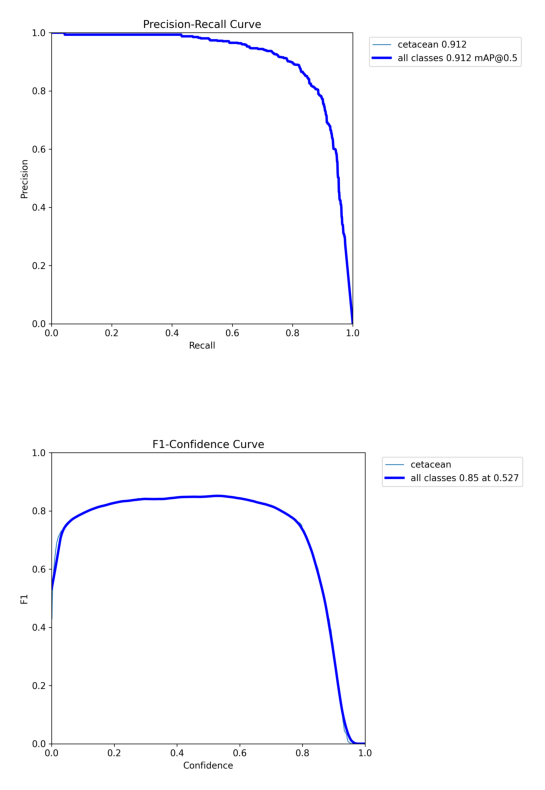

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
pr_curve = Image.open("/home/jctactay/photograding/detection/runs/detect/val2/PR_curve.png")
f1_curve = Image.open("/home/jctactay/photograding/detection/runs/detect/val2/F1_curve.png")
fig, ax = plt.subplots(2, figsize=(10,10))
ax[0].imshow(pr_curve)
ax[0].axis("off")
ax[1].imshow(f1_curve)
ax[1].axis("off")

In [11]:
best.predict("/home/jctactay/photograding/detection/Cetacean-Detector-5/test/images", save=True, conf=0.4)


image 1/217 /home/jctactay/photograding/detection/Cetacean-Detector-5/test/images/2021-08-17_D500_CL_Photo_002_JPG.rf.ebe0d4bd0377d55f9c79c97d5220e335.jpg: 448x640 1 cetacean, 159.0ms
image 2/217 /home/jctactay/photograding/detection/Cetacean-Detector-5/test/images/2021-08-17_D500_CL_Photo_006_JPG.rf.efb3c450f16d74ec07e25568c2daae71.jpg: 448x640 2 cetaceans, 16.3ms
image 3/217 /home/jctactay/photograding/detection/Cetacean-Detector-5/test/images/2021-08-17_D500_CL_Photo_009_JPG.rf.141db65c532c32795eee5cee0a429e0d.jpg: 448x640 (no detections), 16.7ms
image 4/217 /home/jctactay/photograding/detection/Cetacean-Detector-5/test/images/2021-08-17_D500_CL_Photo_045_JPG.rf.dc4556dde24f86ef583440f80bd424c9.jpg: 448x640 (no detections), 16.9ms
image 5/217 /home/jctactay/photograding/detection/Cetacean-Detector-5/test/images/2021-08-17_D500_CL_Photo_050_JPG.rf.127b538e5c7d02ecd03237123460f903.jpg: 448x640 1 cetacean, 15.9ms
image 6/217 /home/jctactay/photograding/detection/Cetacean-Detector-5/te

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'cetacean'}
 obb: None
 orig_img: array([[[155, 116,  64],
         [155, 116,  64],
         [155, 116,  64],
         ...,
         [146, 107,  63],
         [146, 107,  63],
         [146, 107,  63]],
 
        [[155, 116,  64],
         [155, 116,  64],
         [156, 117,  65],
         ...,
         [146, 107,  63],
         [146, 107,  63],
         [146, 107,  63]],
 
        [[155, 115,  66],
         [155, 115,  66],
         [156, 116,  67],
         ...,
         [147, 108,  64],
         [147, 108,  64],
         [147, 108,  64]],
 
        ...,
 
        [[140,  98,  53],
         [140,  98,  53],
         [140,  98,  53],
         ...,
         [160, 122,  74],
         [160, 122,  74],
         [159, 121,  73]],
 
        [[135,  93,  48],
         [136,  94,  49],
         [136,  94,  49],
         ...,
         [157, 1

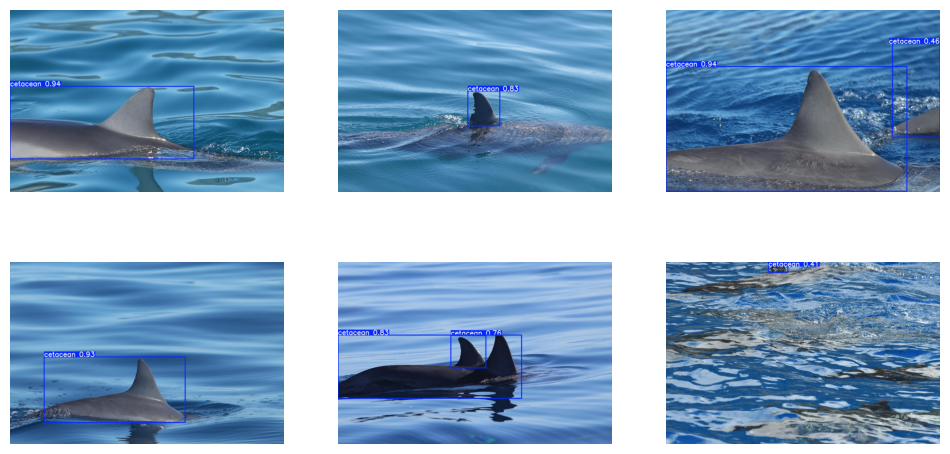

In [12]:
import os
import random as rand
pred_dir = "runs/detect/predict2"
imgs = os.listdir(pred_dir)
fig, axes = plt.subplots(2,3, figsize=(12,6))
for img, ax in zip(rand.sample(imgs, 6), axes.flatten()):
    path = os.path.join(pred_dir, img)
    ax.imshow(Image.open(path))
    ax.axis("off")

### 16 batch model

In [32]:
# 100 epochs, 16 batch
best = YOLO("runs/detect/train4/weights/best.pt")

metrics = best.val(data=f"{dataset.location}/data.yaml")

Ultralytics YOLOv8.2.102 🚀 Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /home/jctactay/Cetacean-Detector-4/valid/labels.cache... 378 images, 57 backgrounds, 0 corrupt: 100%|██████████| 378/378 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:27<00:00,  3.65s/it]


                   all        378        562       0.82      0.747      0.846      0.556
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val12


(-0.5, 2249.5, 1499.5, -0.5)

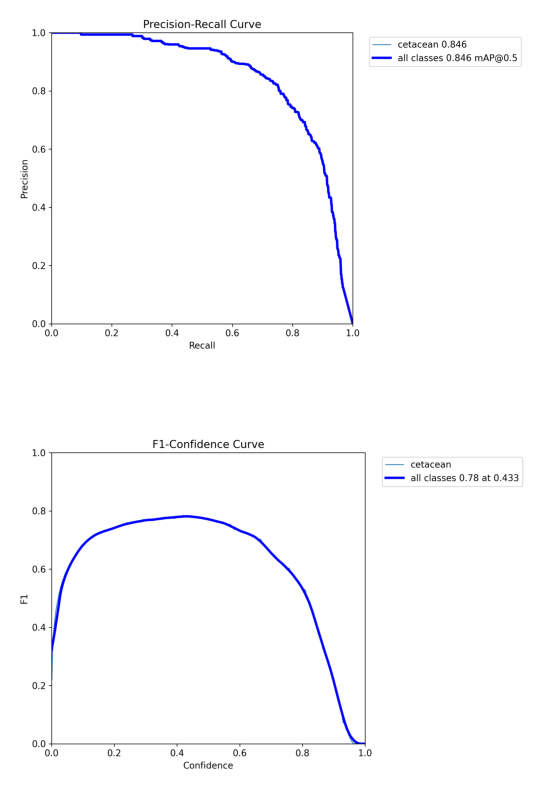

In [33]:
pr_curve = Image.open("runs/detect/val3/PR_curve.png")
f1_curve = Image.open("runs/detect/val3/F1_curve.png")
fig, ax = plt.subplots(2, figsize=(10,10))
ax[0].imshow(pr_curve)
ax[0].axis("off")
ax[1].imshow(f1_curve)
ax[1].axis("off")

In [34]:
best.predict("/home/jctactay/Cetacean-Detector-4/test/images", save=True, conf=0.4)


image 1/185 /home/jctactay/Cetacean-Detector-4/test/images/2021-08-17_D500_CL_Photo_002_JPG.rf.f107b572ea9f829d2f15ec2fa4d57be6.jpg: 448x640 1 cetacean, 6.9ms
image 2/185 /home/jctactay/Cetacean-Detector-4/test/images/2021-08-17_D500_CL_Photo_006_JPG.rf.7847906bc09768ac5cf0856cc27af653.jpg: 448x640 2 cetaceans, 8.3ms
image 3/185 /home/jctactay/Cetacean-Detector-4/test/images/2021-08-17_D500_CL_Photo_009_JPG.rf.ee897b39ac7878276f912c86dc120c00.jpg: 448x640 (no detections), 6.0ms
image 4/185 /home/jctactay/Cetacean-Detector-4/test/images/2021-08-17_D500_CL_Photo_045_JPG.rf.03bf6e98ce23bfe0b79b509849c4a8c5.jpg: 448x640 1 cetacean, 5.7ms
image 5/185 /home/jctactay/Cetacean-Detector-4/test/images/2021-08-17_D500_CL_Photo_050_JPG.rf.082f57e07b746282e3c1d4dc7fa08c2a.jpg: 448x640 (no detections), 5.5ms
image 6/185 /home/jctactay/Cetacean-Detector-4/test/images/2021-08-17_D500_CL_Photo_075_JPG.rf.0f47b4d71c20776ebf0f0c7ed2f18299.jpg: 448x640 (no detections), 6.0ms
image 7/185 /home/jctactay/Ce

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'cetacean'}
 obb: None
 orig_img: array([[[157, 117,  69],
         [156, 116,  68],
         [155, 115,  67],
         ...,
         [145, 106,  61],
         [143, 104,  59],
         [142, 103,  58]],
 
        [[156, 116,  68],
         [156, 116,  68],
         [155, 115,  67],
         ...,
         [146, 107,  62],
         [144, 105,  60],
         [143, 104,  59]],
 
        [[156, 116,  68],
         [155, 115,  67],
         [155, 115,  67],
         ...,
         [146, 107,  62],
         [145, 106,  61],
         [144, 105,  60]],
 
        ...,
 
        [[134,  92,  47],
         [133,  91,  46],
         [133,  91,  46],
         ...,
         [158, 118,  70],
         [158, 118,  70],
         [157, 117,  69]],
 
        [[133,  91,  46],
         [133,  91,  46],
         [133,  91,  46],
         ...,
         [160, 1

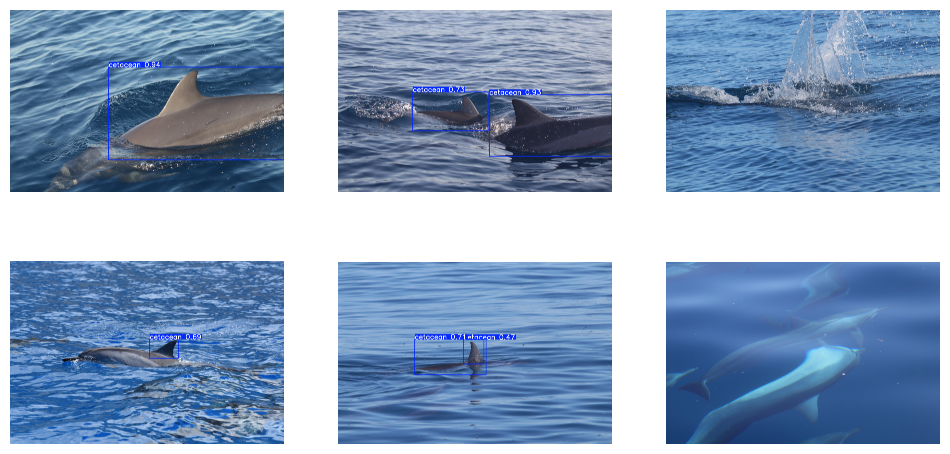

In [35]:
pred_dir = "runs/detect/predict3"
imgs = os.listdir(pred_dir)
fig, axes = plt.subplots(2,3, figsize=(12,6))
for img, ax in zip(rand.sample(imgs, 6), axes.flatten()):
    path = os.path.join(pred_dir, img)
    ax.imshow(Image.open(path))
    ax.axis("off")

### Comparison

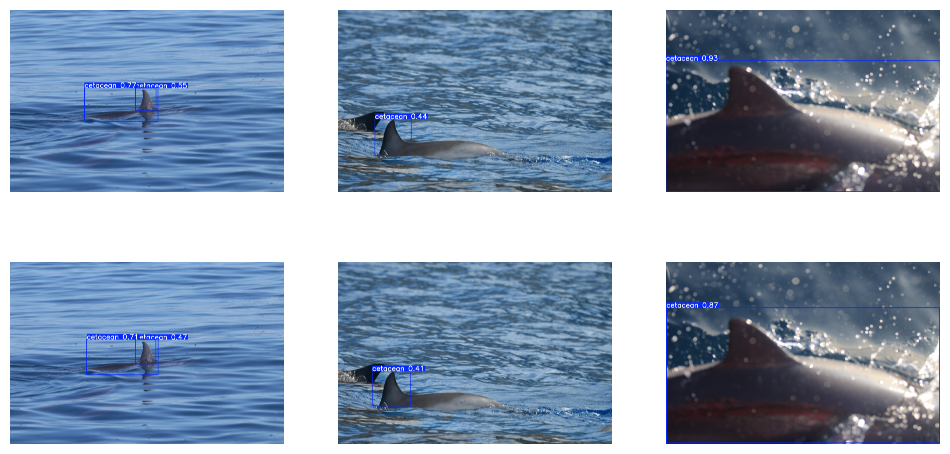

In [39]:
sampled_imgs = rand.sample(imgs,3)
fig, ax = plt.subplots(2,3, figsize=(12,6))
for i in range(len(sampled_imgs)):
    path = os.path.join("runs/detect/predict2", sampled_imgs[i])
    ax[0, i].imshow(Image.open(path))
    path = os.path.join("runs/detect/predict3", sampled_imgs[i])
    ax[1, i].imshow(Image.open(path))
    ax[0, i].axis("off")
    ax[1, i].axis("off")

Model trained on 32-batch size mostly predicts the same boxes as the model trained on 16-batch size, but the predictions are of higher confidence.

## Deployment

In [7]:
%pip install --upgrade roboflow

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
project.version(5).deploy(model_type="yolov11", model_path="/home/jctactay/photograding/detection/runs/detect/train3/")

View the status of your deployment at: https://app.roboflow.com/whalecrop/cetacean-detector/5
Share your model with the world at: https://universe.roboflow.com/whalecrop/cetacean-detector/model/5
